#3.Trực quan hóa dữ liệu theo nhóm phân loại 

Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked 
Gợi ý - - - - 
Lọc dữ liệu giới tính là nữ 
Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại 
Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS] 
Ox: thể hiện nhóm XL1, XL2 và XL3 

<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

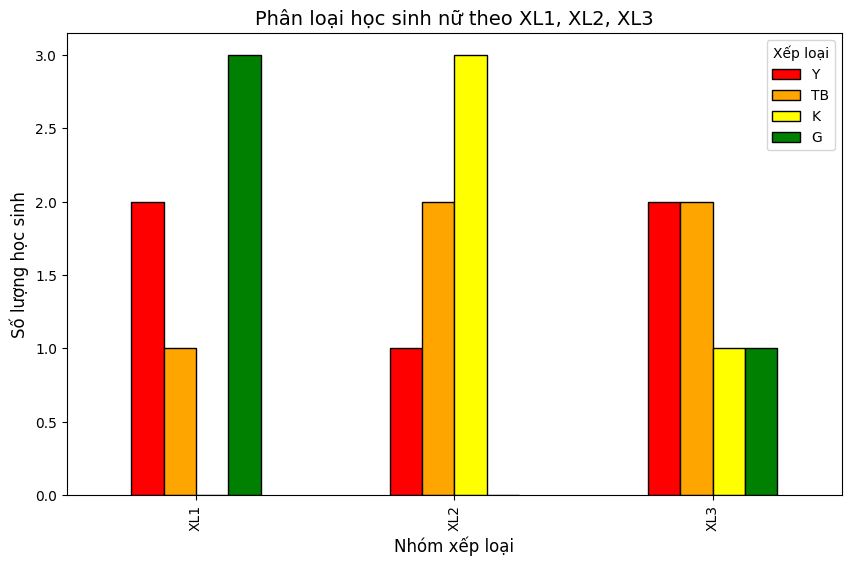

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Tạo dữ liệu mẫu
data = {
    "GioiTinh": ["Nam", "Nữ", "Nữ", "Nam", "Nữ", "Nữ", "Nam", "Nữ", "Nam", "Nữ"],
    "XL1": ["G", "XS", "K", "TB", "G", "XS", "K", "G", "TB", "XS"],
    "XL2": ["K", "TB", "G", "XS", "TB", "K", "G", "TB", "XS", "K"],
    "XL3": ["XS", "G", "K", "TB", "TB", "G", "K", "XS", "G", "K"],
}
# Tạo DataFrame
df = pd.DataFrame(data)
# Lọc dữ liệu học sinh nữ
df_female = df[df["GioiTinh"] == "Nữ"]

# Đếm số lượng học sinh theo xếp loại cho XL1, XL2, XL3
count_xl1 = df_female["XL1"].value_counts()
count_xl2 = df_female["XL2"].value_counts()
count_xl3 = df_female["XL3"].value_counts()
# Tạo DataFrame chứa dữ liệu đếm
count_data = pd.DataFrame({
    "XL1": count_xl1,
    "XL2": count_xl2,
    "XL3": count_xl3,
}).fillna(0)  # Điền giá trị NaN bằng 0
# Vẽ biểu đồ
count_data.T.plot(
    kind="bar", 
    figsize=(10, 6), 
    color=["red", "orange", "yellow", "green", "blue"],  # Màu cho các xếp loại
    edgecolor="black"
)
# Thiết lập tiêu đề và nhãn
plt.title("Phân loại học sinh nữ theo XL1, XL2, XL3", fontsize=14)
plt.xlabel("Nhóm xếp loại", fontsize=12)
plt.ylabel("Số lượng học sinh", fontsize=12)
plt.legend(title="Xếp loại", labels=["Y", "TB", "K", "G", "XS"])
plt


2.Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2

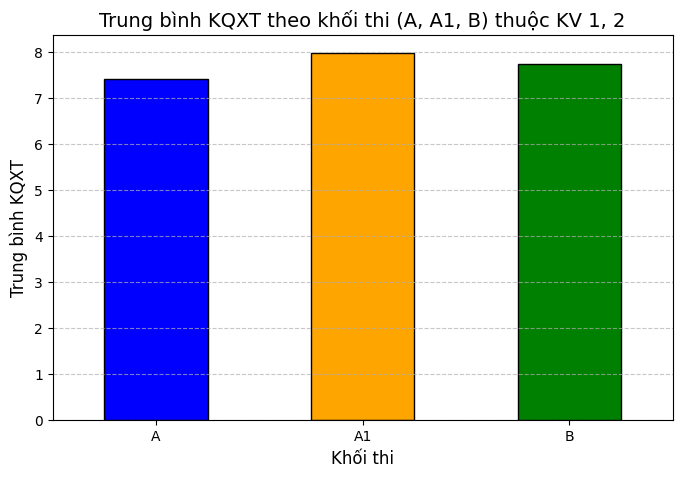

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Tạo dữ liệu mẫu
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "KV": [1, 2, 1, 2, 1, 1, 2, 2, 1, 1],
    "KQXT": [7.5, 8.0, 6.5, 7.0, 8.2, 9.0, 7.8, 8.5, 6.9, 7.3],
}
# Tạo DataFrame
df = pd.DataFrame(data)
# Lọc dữ liệu học sinh thuộc khối A, A1, B và khu vực 1, 2
df_filtered = df[(df["KhoiThi"].isin(["A", "A1", "B"])) & (df["KV"].isin([1, 2]))]
# Tính giá trị trung bình KQXT theo từng khối thi
mean_kqxt = df_filtered.groupby("KhoiThi")["KQXT"].mean()
# Trực quan hóa bằng biểu đồ cột
mean_kqxt.plot(
    kind="bar", 
    figsize=(8, 5), 
    color=["blue", "orange", "green"], 
    edgecolor="black"
)
# Thiết lập tiêu đề và nhãn
plt.title("Trung bình KQXT theo khối thi (A, A1, B) thuộc KV 1, 2", fontsize=14)
plt.xlabel("Khối thi", fontsize=12)
plt.ylabel("Trung bình KQXT", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()


3.Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi


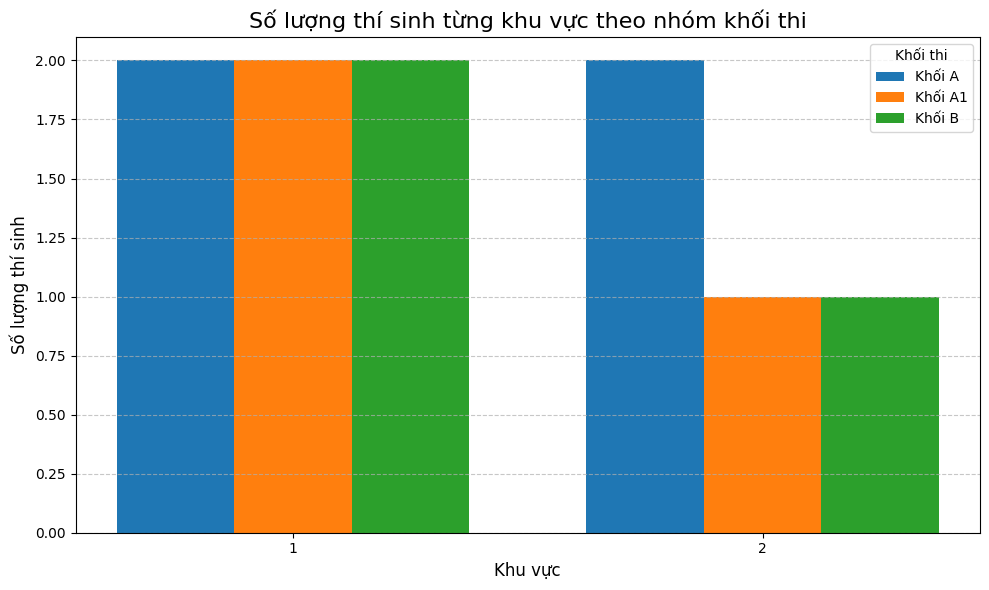

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Tạo dữ liệu mẫu
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "KV": [1, 2, 1, 2, 1, 1, 2, 2, 1, 1],
}
# Tạo DataFrame
df = pd.DataFrame(data)

# Tính số lượng thí sinh theo từng khu vực và khối thi
pivot_table = df.pivot_table(
    index="KV",
    columns="KhoiThi",
    aggfunc="size",
    fill_value=0,
)
# Vẽ biểu đồ cột nhóm
bar_width = 0.25
index = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(10, 6))
# Thêm từng khối thi vào biểu đồ
for i, khoi in enumerate(pivot_table.columns):
    ax.bar(
        index + i * bar_width,
        pivot_table[khoi],
        bar_width,
        label=f"Khối {khoi}",
    )
# Thiết lập nhãn và tiêu đề
ax.set_title("Số lượng thí sinh từng khu vực theo nhóm khối thi", fontsize=16)
ax.set_xlabel("Khu vực", fontsize=12)
ax.set_ylabel("Số lượng thí sinh", fontsize=12)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot_table.index)
ax.legend(title="Khối thi", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


4.Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi 

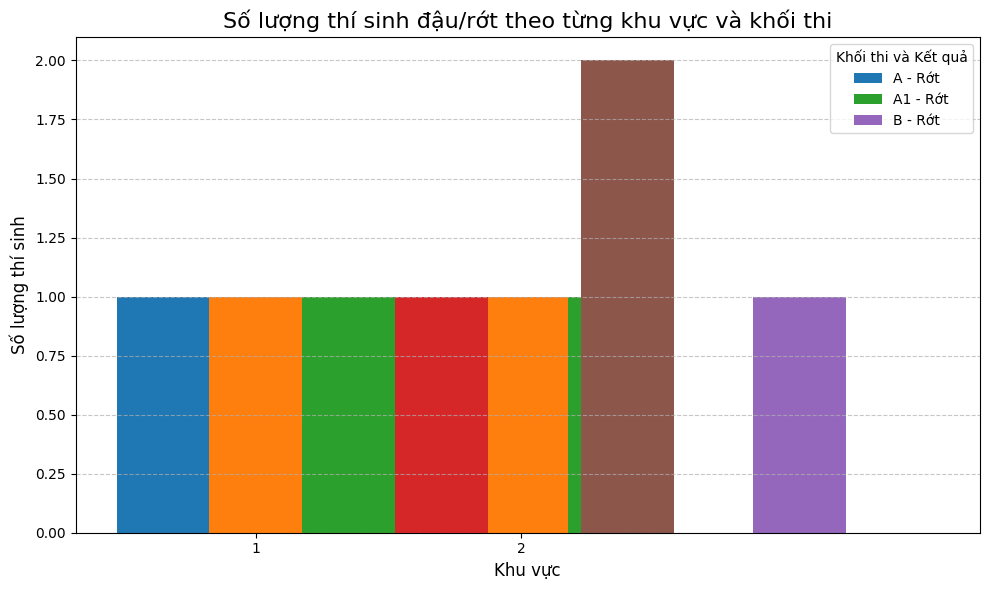

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu mẫu với kết quả thi (đậu/rớt)
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "KV": [1, 2, 1, 2, 1, 1, 2, 2, 1, 1],
    "KetQua": ["Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt"]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Tính số lượng thí sinh đậu/rớt theo từng khu vực và khối thi
pivot_table = df.pivot_table(
    index="KV",
    columns=["KhoiThi", "KetQua"],
    aggfunc="size",
    fill_value=0,
)

# Vẽ biểu đồ cột nhóm
bar_width = 0.35  # Điều chỉnh độ rộng của cột
index = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(10, 6))

# Thêm từng nhóm (đậu và rớt) vào biểu đồ cho mỗi khối thi
for i, khoi in enumerate(pivot_table.columns.levels[0]):
    for j, ketqua in enumerate(pivot_table.columns.levels[1]):
        ax.bar(
            index + (i * len(pivot_table.columns.levels[1]) + j) * bar_width,
            pivot_table[khoi, ketqua],
            bar_width,
            label=f"{khoi} - {ketqua}" if j == 0 else "",
        )

# Thiết lập nhãn và tiêu đề
ax.set_title("Số lượng thí sinh đậu/rớt theo từng khu vực và khối thi", fontsize=16)
ax.set_xlabel("Khu vực", fontsize=12)
ax.set_ylabel("Số lượng thí sinh", fontsize=12)
ax.set_xticks(index + bar_width * (len(pivot_table.columns.levels[1]) / 2))
ax.set_xticklabels(pivot_table.index)
ax.legend(title="Khối thi và Kết quả", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


5.Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực. 

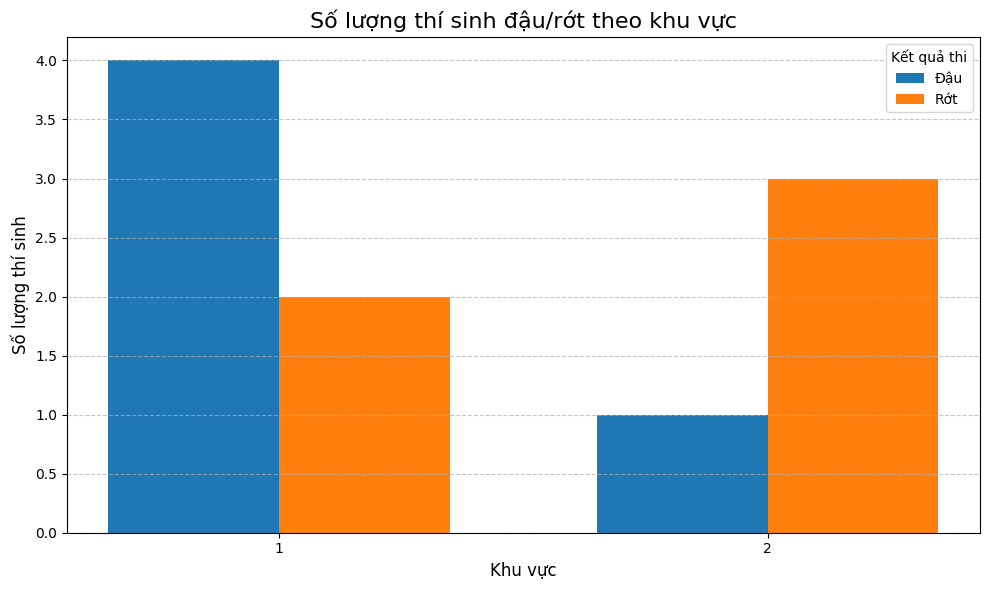

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nump as np
# Tạo dữ liệu mẫu với kết quả thi (đậu/rớt)
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "KV": [1, 2, 1, 2, 1, 1, 2, 2, 1, 1],
    "KetQua": ["Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt"]
}
# Tạo DataFrame
df = pd.DataFrame(data)
# Tính số lượng thí sinh đậu/rớt theo từng khu vực
pivot_table = df.pivot_table(
    index="KV",  # Khu vực
    columns="KetQua",  # Kết quả thi (Đậu/Rớt)
    aggfunc="size",  # Đếm số lượng
    fill_value=0,  # Điền giá trị 0 nếu không có dữ liệu
)
# Vẽ biểu đồ cột nhóm
bar_width = 0.35  # Độ rộng của cột
index = np.arange(len(pivot_table.index))  # Vị trí các cột trên trục X
fig, ax = plt.subplots(figsize=(10, 6))
# Thêm từng nhóm "Đậu" và "Rớt" vào biểu đồ
ax.bar(index - bar_width / 2, pivot_table["Đậu"], bar_width, label="Đậu")
ax.bar(index + bar_width / 2, pivot_table["Rớt"], bar_width, label="Rớt")
# Thiết lập nhãn và tiêu đề
ax.set_title("Số lượng thí sinh đậu/rớt theo khu vực", fontsize=16)
ax.set_xlabel("Khu vực", fontsize=12)
ax.set_ylabel("Số lượng thí sinh", fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(pivot_table.index)
ax.legend(title="Kết quả thi", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


6.Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc 

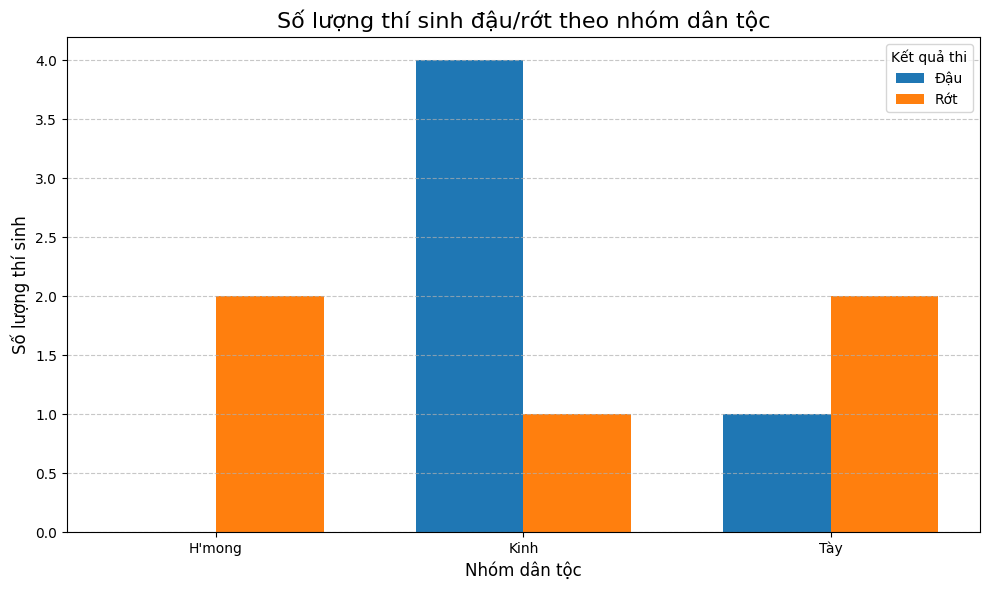

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu mẫu với kết quả thi (đậu/rớt) và nhóm dân tộc
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "Dantoc": ["Kinh", "H'mong", "Kinh", "Tày", "Kinh", "Tày", "Kinh", "Kinh", "Tày", "H'mong"],
    "KetQua": ["Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt"]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Tính số lượng thí sinh đậu/rớt theo từng nhóm dân tộc
pivot_table = df.pivot_table(
    index="Dantoc",  # Nhóm dân tộc
    columns="KetQua",  # Kết quả thi (Đậu/Rớt)
    aggfunc="size",  # Đếm số lượng
    fill_value=0,  # Điền giá trị 0 nếu không có dữ liệu
)

# Vẽ biểu đồ cột nhóm
bar_width = 0.35  # Độ rộng của cột
index = np.arange(len(pivot_table.index))  # Vị trí các cột trên trục X

fig, ax = plt.subplots(figsize=(10, 6))

# Thêm từng nhóm "Đậu" và "Rớt" vào biểu đồ
ax.bar(index - bar_width / 2, pivot_table["Đậu"], bar_width, label="Đậu")
ax.bar(index + bar_width / 2, pivot_table["Rớt"], bar_width, label="Rớt")

# Thiết lập nhãn và tiêu đề
ax.set_title("Số lượng thí sinh đậu/rớt theo nhóm dân tộc", fontsize=16)
ax.set_xlabel("Nhóm dân tộc", fontsize=12)
ax.set_ylabel("Số lượng thí sinh", fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(pivot_table.index)
ax.legend(title="Kết quả thi", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


7Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính. 

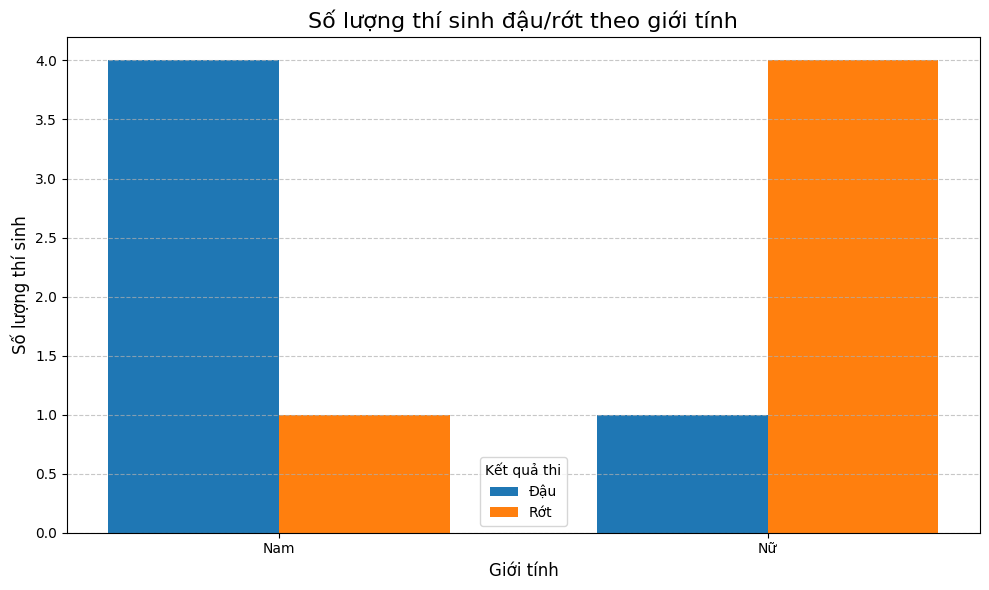

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu mẫu với kết quả thi (đậu/rớt) và giới tính
data = {
    "KhoiThi": ["A", "A1", "B", "A", "B", "A1", "A", "B", "A1", "A"],
    "GioiTinh": ["Nam", "Nữ", "Nam", "Nữ", "Nam", "Nữ", "Nam", "Nữ", "Nữ", "Nam"],
    "KetQua": ["Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt", "Đậu", "Rớt"]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Tính số lượng thí sinh đậu/rớt theo từng nhóm giới tính
pivot_table = df.pivot_table(
    index="GioiTinh",  # Giới tính
    columns="KetQua",  # Kết quả thi (Đậu/Rớt)
    aggfunc="size",  # Đếm số lượng
    fill_value=0,  # Điền giá trị 0 nếu không có dữ liệu
)

# Vẽ biểu đồ cột nhóm
bar_width = 0.35  # Độ rộng của cột
index = np.arange(len(pivot_table.index))  # Vị trí các cột trên trục X

fig, ax = plt.subplots(figsize=(10, 6))

# Thêm từng nhóm "Đậu" và "Rớt" vào biểu đồ
ax.bar(index - bar_width / 2, pivot_table["Đậu"], bar_width, label="Đậu")
ax.bar(index + bar_width / 2, pivot_table["Rớt"], bar_width, label="Rớt")

# Thiết lập nhãn và tiêu đề
ax.set_title("Số lượng thí sinh đậu/rớt theo giới tính", fontsize=16)
ax.set_xlabel("Giới tính", fontsize=12)
ax.set_ylabel("Số lượng thí sinh", fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(pivot_table.index)
ax.legend(title="Kết quả thi", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
